In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
]

In [3]:
vectorizer = TfidfVectorizer()

In [4]:
X = vectorizer.fit_transform(corpus)

In [5]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [6]:
X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [7]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

- Importing data for news

In [8]:
from sklearn.datasets import fetch_20newsgroups

In [9]:
data = fetch_20newsgroups()

In [10]:
dir(data)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [11]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- if you want to check data of first sample or other sample

In [12]:
data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

- Our data at 5th index is :

In [13]:
data.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

- Total data we have

In [15]:
len(data.data)

11314

In [16]:
data.target

array([7, 4, 4, ..., 3, 1, 8])

- store all data in varible

In [17]:
categories = data.target_names

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X = data.data
y = data.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB


In [24]:
from sklearn.pipeline import Pipeline

In [25]:
X_train[0]

"From: Rupin.Dang@dartmouth.edu (Rupin Dang)\nSubject: Nikon FM2 and lens forsale\nOrganization: Dartmouth College, Hanover, NH\nLines: 5\n\nNikon FM-2n with 50 mm Nikkor and accessories for sale.I bought this camera in\nHong Kong two years ago and everything has been looked after very well. I'm now\nselling some more gear to finance my next big film project.\n\nAsking $350 for package. NO BARGAINS.\n"

In [27]:
model = Pipeline([('vectorizer', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [28]:
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [29]:
model.score(X_test, y_test)

0.8448961555457357

In [30]:
predicted = model.predict(X_test)

- Now we have to plot confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix


In [32]:
cm = confusion_matrix(y_test, predicted)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

- Now If you want to provide names to values

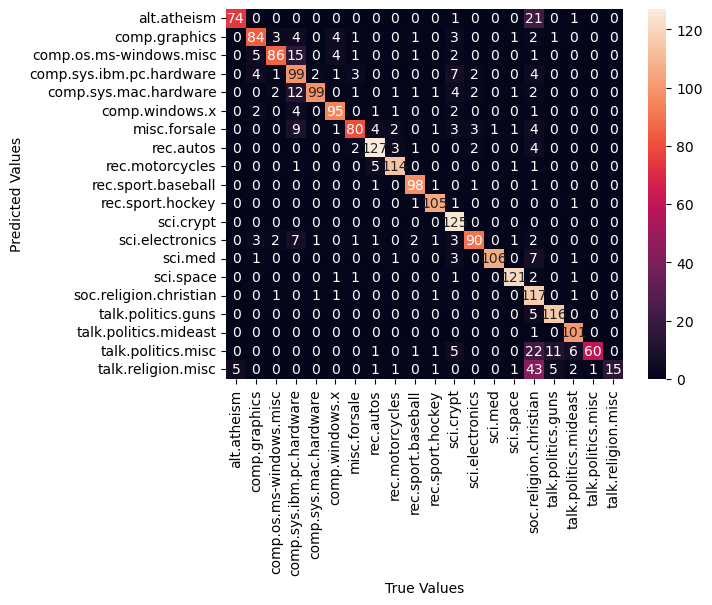

In [41]:
sns.heatmap(cm, annot = True, fmt = 'd',
           xticklabels= categories, yticklabels=categories)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()